In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_2017 = pd.read_csv('/Users/rakesh/Documents/DSC167/hmda_2017_nationwide_all-records_labels.csv', 
                      dtype = {'msamd': str, 'state_code': str, 'county_code': str, 'census_tract_number': str,
                              'denial_reason_1':str, 'denial_reason_2': str, 'denial_reason_3': str})

/Users/rakesh/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Rakesh Senthilvelan and Shin Ehara

## Introduction
When it comes to lending, there have always been disparities between different groups of people in terms of acceptance and accessibility. There have been numerous ways in which discrimination has been employed throughout the years, with lending being one of the largest areas. We wanted to examine the disparities that exist between groups based on race, gender, and sexual orientation among others. The reason we came to these disparities was based on reading previous works done through research institutions such as Vanderbilt University (https://business.vanderbilt.edu/news/2020/07/20/racial-disparities-in-lending-markets/), Proceedings of the National Academy of Sciences of the United States of America (https://www.pnas.org/content/116/19/9293), and the National Community Reinvestment Coalition (https://ncrc.org/wp-content/uploads/2009/07/ncrc%20nosheild%20june%2009.pdf). We wanted to see the specificities of these disparities in terms of how they are carried out in the real world, whether certain other inequities have a domino effect towards lending data, and what potential solutions there may be to this disparity. To look into this, we took in data from the HMDA, short for the Home Mortgage Disclosure Act, which will show data on loan applications for houses. We will be able to see many factors such as race, gender of applicant and co-applicant, income bracket, reason for loan denial, and more. Throughout the research project, we will dive into different areas of discrimination or bias seen in lending data provided by the HMDA in 2017, finding the reasons behind them, and looking into potential areas that will need to be addressed by lenders in the future for a more equitbale experience for everybody.

## Justification for the Data in Approaching the Problem at Hand
The data provided by HMDA dataset provides a lot of insight into the inequities that are present in loans. The data in question is the most recently available set to us, which is 2017. In the preliminary exploratory data analysis, we looked into application status based on race. What we found in this step was interesting. In terms of application status based on race, we noticed significant discrepancies for loan approvals by race, with White and Asian applicants seeing approval ratings around 58%, Hawaiian Native and Pacfic Islander applicants around 51%, and Native American and Black applicants around 44-45%. This shows a significant gap in loan approval ratings between racial groups and this is something we look to further examine in our paper. We believe this will be an interesting area to further examine in the final paper. Based on our EDA, we found numerous statistical differences in the loan data that would potentially point to inequities in this system of America. As a result, this dataset is a strong source to examine the problem at hand and examine the specificities of this inequity in our society.

## Where Does the Data Have Shortcomings?
The data is limited in a few ways. The first is that this is limited to mortgage data from 2017, which limits the amount of overall lending data that is done in the country. Generally, there are many cases where people in this country would not or can not become home buyers. Looking into other, more accesible forms of loans such as car loans would have also been useful in studying the deeper parts of inequity in lending. In addition, there are many cases where the data in this set has missing or undisclosed values for race data. While there are still significant portions of the data that are labeled, there are a lot that have significant statistics attached to them but with race being disclosed as "Information not disclosed by applicant in mail, Internet, or telephone application" or "Not applicable". In the scope of our project, these data points are lost as we cannot decipher their meaning in relation to the inequity we are trying to spotlight.

## The Context of the Inequity
The financial inequities faced by minority populations is not a new concept. According to a report done in 1996 by the Federal Reserve Bank of Boston, it was found that there existed a discrepancy where, when it came to mortgage applications, "minority applicants with the same economic and property characteristics as white applicants would experience a denial rate of 17 percent rather than the actual white denial rate of 11 percent". To further understand this discepancy, we must look into concepts of equality. From an egalitarian perspective, this shows a significant discrepancy, with a look into the comparative nature of the above statement showing that there is not equal access to the opportunity of receiving a mortgage. From a Rawlisian perspective, this discrepancy does not entitle everybody from the same financial background to the same liberties and opportunities in purchasing a house. This shows that when looking at this research from multiple perspectives of equality, they universally conclude that there is inequality in this situation. However, this was in 1996, that brings forward the question. Has this inequity gotten better since then? In a study from Professor Mark Cohen of Vanderbilt University in July of 2020, it was found that "African Americans pay twice the markup whites did". This indicates that inequality still exists in the lending industry against minority groups when it comes to loan rejection rates and markups on properties.

## Hypothesis

Based on our preliminary exploratory data analysis and the historical context of this issue, we have the alternative hypothesis that when it comes to mortgage lending that there are significant discrepancies between different racial groups when it comes to loan approval in similar income and loan amount brackets. Our null hypothesis is that there is no significant discrepancy between loan appovals by race within similar income and loan amount brackets.

## Regarding Application Status Based on Race

The key for actions is as follows: 1 represents loan originated, 2 represents application approved but not accepted, 3 represents application denied by financial institution, 4 represents application withdrawn by applicant, 5 represents file closed for incompleteness, 6 represents loan purchased by institution, 7 represents Preapproval request denied by financial institution, and 8 represents Preapproval request approved but not accepted (optional reporting).

In [4]:
df_race_action = df_2017[['action_taken_name','action_taken','applicant_race_name_1','applicant_race_1']]
white_action = df_race_action[df_race_action['applicant_race_1'] == 5]
white_demo = white_action['action_taken'].value_counts(normalize=True) * 100

In [5]:
black_action = df_race_action[df_race_action['applicant_race_1'] == 3]
black_demo = black_action['action_taken'].value_counts(normalize=True) * 100

In [6]:
na_action = df_race_action[df_race_action['applicant_race_1'] == 1]
na_demo = na_action['action_taken'].value_counts(normalize=True) * 100

In [7]:
asian_action = df_race_action[df_race_action['applicant_race_1'] == 2]
asian_demo = asian_action['action_taken'].value_counts(normalize=True) * 100

In [8]:
pa_action = df_race_action[df_race_action['applicant_race_1'] == 4]
pa_demo = pa_action['action_taken'].value_counts(normalize=True) * 100

To get the following statistics, we grouped the dataset by the noted groups in the race category then looked at the percentages of each loan action for each racial group. When looking at the overall rates of rejection for different racial groups, this is what comes up. This shows a significant discrepancy between rejection rates based on race, with the rates for Black and Native American applicants being almost double that of White and Asian applicants.

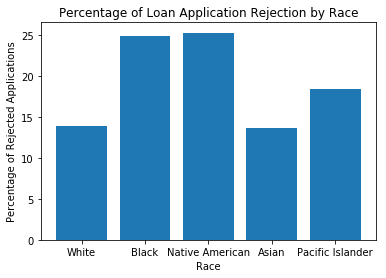

In [10]:
race = ['White', 'Black', 'Native American', 'Asian', 'Pacific Islander']
reject = [13.936836, 24.862152, 25.251852, 13.691896, 18.328900]

plt.bar(race, reject)
plt.title('Percentage of Loan Application Rejection by Race')
plt.xlabel('Race')
plt.ylabel('Percentage of Rejected Applications')
plt.show()

## The Effects of Income on Loan Approval

When we first looked into the exploratory data analysis on application statuses based on raced, we noticed significant disparities between different racial groups in terms of the percentages that were accepted for loans. We first wanted to see if there were other disparities that may have impacted these statistics. The first was to look into income data and see if there are major disparities here that may lead to certain racial groups seeing higher rates of rejection. 